<a href="https://colab.research.google.com/github/Aayu0710/Data-Science-ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import matplotlib.pyplot as plt

In [ ]:
# downloading dataset
dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz'
download_url(dataset_url, '.')

In [ ]:
#extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='./data')

In [ ]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir+'/train')
print(classes)

In [ ]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir+'/test')
print(classes)

In [ ]:
airplane_files = os.listdir(data_dir+'/train/airplane')
print('number of training example for airplane: ', len(airplane_files))
print(airplane_files[:5])

In [ ]:
ship_test_files = os.listdir(data_dir+'/test/ship')
print('number of testing example for ship: ', len(ship_test_files))
print(ship_test_files[:5])

the above dict strucrure(one folder per class) is used by many CV datasets, most of the deep learning libaries provide utilities for working with such dataset, in pytorch we have **ImageFolder** class from torch vision to load the data as pytoch tensors


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

In [ ]:
print(dataset.classes)

In [ ]:
# for viewing the image we need to change the dim from (3,32,32) to (32,32,3)
def show_example(img,label):
  print('label: ', dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

In [ ]:
show_example(*dataset[0])

In [ ]:
show_example(*dataset[100])

In [ ]:
show_example(*dataset[2310])

In [ ]:
pip install jovian

In [ ]:
import jovian

In [ ]:
jovian.commit

In [ ]:
#training and validation dataset

1. Training set: use to train the model,it compute the loss and adjust the weights the model using gradient decent.
2. Validation set: use to evalute the model while training, adjust hyerparameter(learning rate etc.) and pcik the best version of model.
3. Test set: used to compare different models, or differnt types of modeling approaches and report the final accuracy of the model.

In [ ]:
import numpy as np
def split_indices(n, val_pct=0.1, seed=99):
  # defining the size of validation set
  n_val = int(val_pct*n)
  #set the random seed(fro reproducibility)
  np.random.seed(seed)
  # create a random permutaion of 0-n-1
  idxs = np.random.permutation(n)
  #picks first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val]


In [ ]:
val_pct = 0.2
rand_seed = 42
train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices), len(val_indices))
print('sample validation indices: ', val_indices[:10])

upto now we hae split the 20% for validation set from tranining dataset. to process our data into samller batches, we need to create a data loader from pytorch using "SubsetRandomSampler", which samples elements randomly from a given list of indicrs, while greating batches of data.

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size=100

In [ ]:
#training sampler data laoder
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sampler)

#validation sampler data loader
val_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset, batch_size, sampler=val_sampler)

Since we have loaded our data into batches , it is always a good practice to look at those data. for this purpose we can use make_grid method from torchvision. each time the following cod eis run, we get a differnet batch, since smapler shuffl the indices before creating batches

In [ ]:
from torchvision.utils import make_grid
def show_batches(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, 10).permute(1,2,0))
    break

In [ ]:
show_batches(train_dl)

In [ ]:
show_batches(valid_dl)

In [ ]:
jovian.commit

**Concolution neural network**
1. This we use to define our model.
2. A Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

There are certain advantage pffered by cnn when working with image data:

1. *fewer paramters*: a samll set of parametrs is used to calculate outputs of entire image, so the model had much fewer parameters compared to a fully connected layer.
2. *Sparcity of connection:* In each layer, each output element only depends on a small number of input ele. which makes forward passes more efficient
3. *Parameter sharing and spatial invariance:* the feature learned by a kernel in one part of the image can be used to detect similar patter in a differnt part of another images.

we will also **max-pooling** layers to progressively decrease the height and width of teh output tensors from each convolution layers.

In [ ]:
# before defining our model
# lets look how a single convolution layer followed by a max-pooling kkayer operates in the data
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
?nn.Conv2d

In [ ]:
?nn.MaxPool2d

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [ ]:
for images, label in train_dl:
  print('images.shape: ', images.shape)
  out = simple_model(images)
  print('out.shape: ', out.shape)
  break

The conv2d layer transform a 3-channel image to a 16-channel **feature map** and the MaxPool2d layer halves the height and width. The feature map gets smaller as we add more layers, untill we finally left with n*1*1 feature map.(n is no. of channels). Which can be falttened into a vector. We can then add a fully connected layer at the end to get vector of size 10 for each channel.

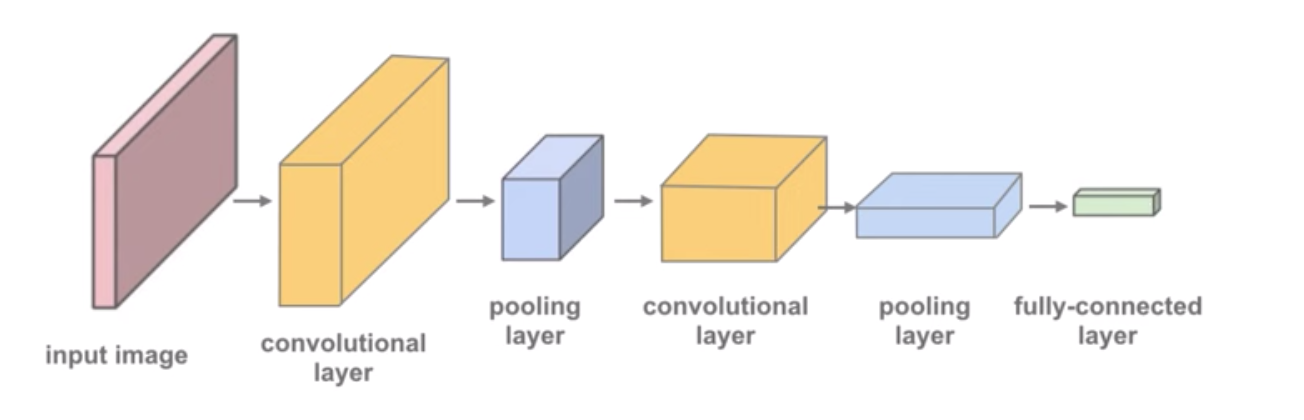

In [ ]:
model = nn.Sequential(
    
)